This notebook compares the performance of different distributed estimation algorithms :<br>
KCF (Kalman Consensus Filter, 2007)<br>
ICF (Information Consensus Filter, 2013)<br>

In [1]:
import os
import settings.input

# Choose target and sensor-network
input_files = []
input_files.append(os.path.join("settings","json_files", "target-rotating.json"))
input_files.append(os.path.join("settings","json_files", "test-network-1.json"))

# Read input files
input_data = settings.input.read(input_files)

Consider a network of sensors connected as,

/usr/local/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


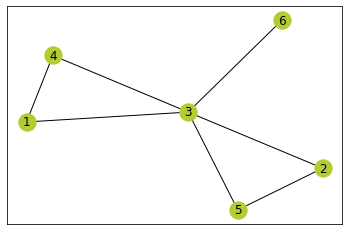

In [2]:
from sim.helpers import show_graph
show_graph(input_data["network"]["adjacency"])

Consider the scenario where sensors `'1'`, `3` and `4` have high estimation error; We expect this to cause poor performance at sensor `'3'`, for distributed estimation protocols that do not weight their neighbors' information (such as the Kalman Consensus Filter). 

In [7]:
input_data["network"]["noise_covariances"]["5"] = [[100, 0], [0, 100]]

Consider a target moving in circles (with system noise) being observed by our sensor network. <br>
We compare the performance of KCF (Kalman Consensus Filter) & ICF (Information Consensus Filter) :

Initializing a sensor network with KCF (2009) scheme...
Warning, the scheme KCF-WC is not fully distributed.
Initializing a sensor network with KCF-WC scheme...
Simulating for 50 time-steps...
Done. 
 ---------------------------- 
KCF Scheme (Poor performance) : 
Plotted history of target coordinates.
Plotted history of sensor 5's estimates.


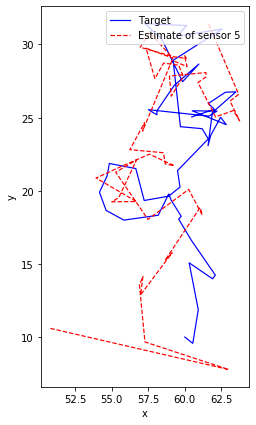

Optimal KCF-WC Scheme (Better performance) : 
Plotted history of target coordinates.
Plotted history of sensor 5's estimates.


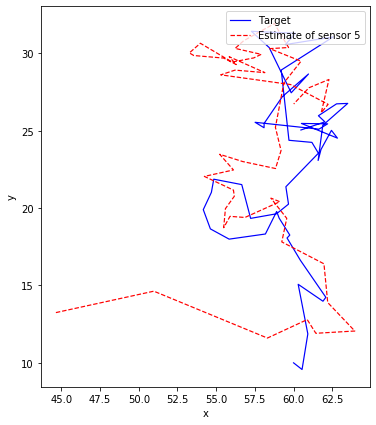

In [8]:
from sim.simulation import simulate_many
sensor_initials = {"estimate_prior": [[30], [10]],
                   "ErrCov_prior": [[100,0],[0,100]]}

results = simulate_many(input_data, duration = 50, est_schemes=["KCF", "KCF-WC"], 
                        sensor_initials=sensor_initials)
print("KCF Scheme (Poor performance) : ")
results[0].plot_xy(target=True, estimates_of="5")
print("Optimal KCF-WC Scheme (Better performance) : ")
results[1].plot_xy(target=True, estimates_of="5")

Estimated Error Covariance of sensor 3, using KCF :


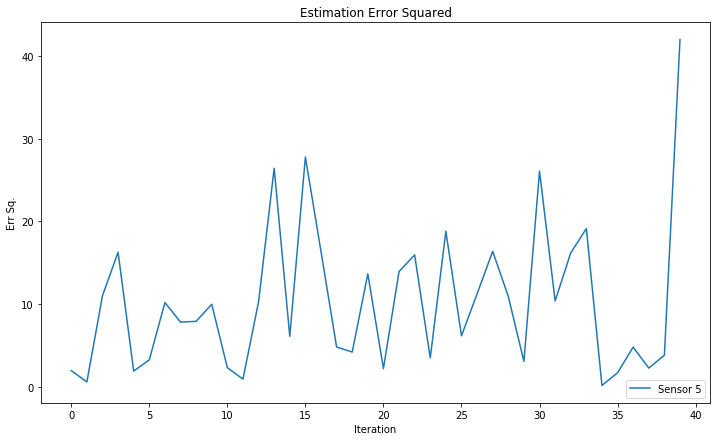

Estimated Error Covariance of sensor 3, using KCF-WC :


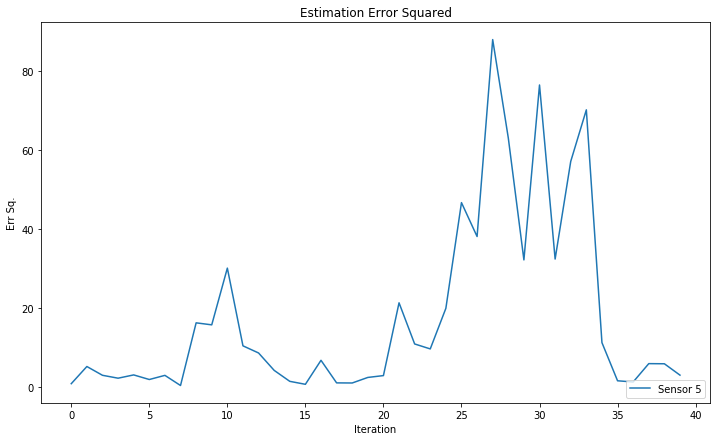

In [11]:
##### Estimation Error (e^T * e)
print("Estimated Error Covariance of sensor 3, using KCF :")
results[0].plot_error_sq(err_of="5")
print("Estimated Error Covariance of sensor 3, using KCF-WC :")
results[1].plot_error_sq(err_of="5")

Estimated Error Covariance of sensor 3, using KCF :


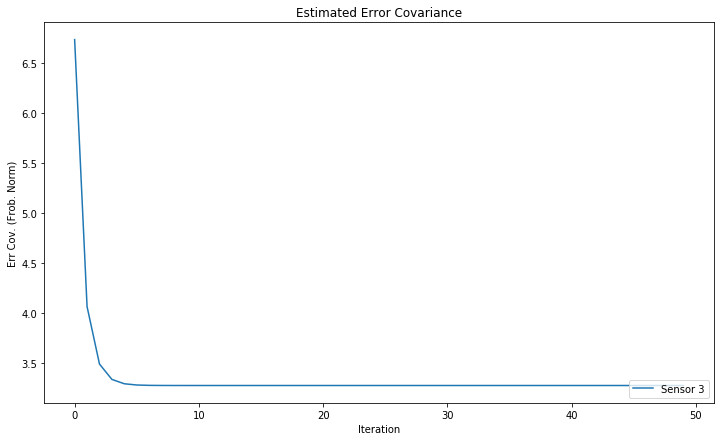

Estimated Error Covariance of sensor 3, using KCF-WC :


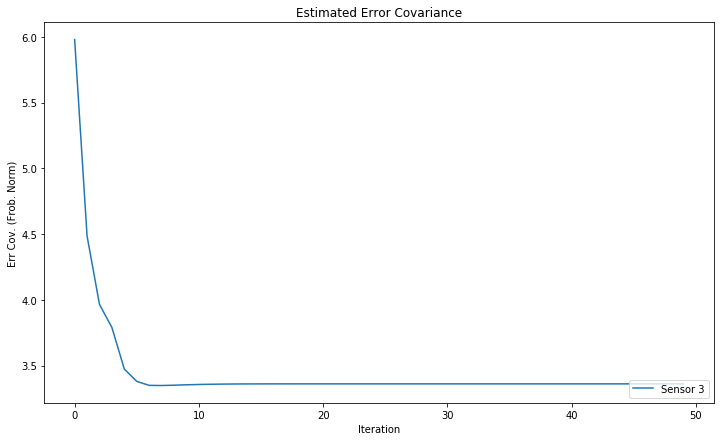

In [10]:
##### Estimated Error Covariance
print("Estimated Error Covariance of sensor 3, using KCF :")
results[0].plot_ErrCov(ErrCov_of="3")
print("Estimated Error Covariance of sensor 3, using KCF-WC :")
results[1].plot_ErrCov(ErrCov_of="3")

Since the sensor network operates via its own classobjects, we can simulate two estimation schemes concurrently and compare their performances. <br>
To simulate a single estimation scheme, use `sim.simulation.simulate`.